Importing Libraries

In [255]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


Reading the data

In [256]:
covid_data = pd.read_csv('covid-data-final.csv')
covid_data

,continent,country,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,18.733,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.000,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.000,37.465,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.000,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.000,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49507,Africa,Zimbabwe,2020-10-10,7994.0,43.0,19.429,229.0,0.0,0.143,537.848,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
49508,Africa,Zimbabwe,2020-10-11,8010.0,16.0,17.857,230.0,1.0,0.286,538.925,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
49509,Africa,Zimbabwe,2020-10-12,8011.0,1.0,18.000,230.0,0.0,0.286,538.992,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
49510,Africa,Zimbabwe,2020-10-13,8021.0,10.0,17.571,230.0,0.0,0.286,539.665,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [257]:
covid_data.shape

(49512, 40)

In [279]:
covid_data.corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
total_cases,1.000000,0.845801,0.871610,0.910075,0.600031,0.667080,0.271153,0.117759,0.174455,0.280965,...,0.061322,-0.065156,-0.064036,0.035602,0.036286,-0.068922,0.046708,-0.027478,0.042529,0.085000
new_cases,0.845801,1.000000,0.981946,0.757298,0.735519,0.773045,0.189310,0.159483,0.201224,0.203552,...,0.039508,-0.055437,-0.059302,0.036005,0.021444,-0.081342,0.044954,-0.041639,0.032606,0.070862
new_cases_smoothed,0.871610,0.981946,1.000000,0.776905,0.724291,0.789286,0.195469,0.140740,0.204954,0.208190,...,0.039537,-0.055443,-0.060253,0.037098,0.020712,-0.083380,0.044189,-0.043186,0.032154,0.070977
total_deaths,0.910075,0.757298,0.776905,1.000000,0.643604,0.718267,0.268685,0.116890,0.171796,0.424353,...,0.098560,-0.101775,-0.132037,0.014294,0.092519,-0.096080,0.097988,-0.024259,0.095920,0.141560
new_deaths,0.600031,0.735519,0.724291,0.643604,1.000000,0.914601,0.147826,0.123047,0.169838,0.224166,...,0.053463,-0.084401,-0.099081,0.027052,0.043959,-0.097496,0.091292,-0.041190,0.060474,0.099571
new_deaths_smoothed,0.667080,0.773045,0.789286,0.718267,0.914601,1.000000,0.165376,0.124296,0.184440,0.253692,...,0.058668,-0.091563,-0.108899,0.029417,0.048408,-0.105440,0.099313,-0.045268,0.065979,0.108706
total_cases_per_million,0.271153,0.189310,0.195469,0.268685,0.147826,0.165376,1.000000,0.441191,0.641866,0.581614,...,0.342878,-0.216301,-0.186263,0.123656,0.072331,-0.046379,0.266174,0.002234,0.245795,0.241067
new_cases_per_million,0.117759,0.159483,0.140740,0.116890,0.123047,0.124296,0.441191,1.000000,0.726241,0.221120,...,0.200768,-0.181720,-0.131052,0.107553,0.083024,-0.019515,0.244028,0.005391,0.141350,0.178224
new_cases_smoothed_per_million,0.174455,0.201224,0.204954,0.171796,0.169838,0.184440,0.641866,0.726241,1.000000,0.322876,...,0.231015,-0.208731,-0.161727,0.133568,0.093688,-0.026940,0.286597,0.001558,0.199217,0.215006
total_deaths_per_million,0.280965,0.203552,0.208190,0.424353,0.224166,0.253692,0.581614,0.221120,0.322876,1.000000,...,0.245524,-0.216456,-0.275083,-0.074196,0.276583,-0.104892,0.215066,0.037925,0.288477,0.290796


Extracting COVID cases and deaths in Italy from the data

In [258]:
Italy_data = covid_data.loc[covid_data['country']=='Italy']
Italy_data

,continent,country,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
23098,Europe,Italy,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,0.000,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.88
23099,Europe,Italy,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,0.000,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.88
23100,Europe,Italy,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,0.000,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.88
23101,Europe,Italy,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,0.000,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.88
23102,Europe,Italy,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.000,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23382,Europe,Italy,2020-10-10,343770.0,5372.0,3408.857,36111.0,28.0,24.286,5685.736,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.88
23383,Europe,Italy,2020-10-11,349494.0,5724.0,3820.429,36140.0,29.0,24.571,5780.407,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.88
23384,Europe,Italy,2020-10-12,354950.0,5456.0,4231.571,36166.0,26.0,25.714,5870.646,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.88
23385,Europe,Italy,2020-10-13,359569.0,4619.0,4569.000,36205.0,39.0,29.000,5947.041,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.88


Assigning the values of X and Y and using fillna(0) to solve nan problem

In [259]:
Y = Italy_data['total_deaths']
X = Italy_data['total_cases']
X = X.fillna(0)
Y = Y.fillna(0)
X


23098         0.0
23099         0.0
23100         0.0
23101         0.0
23102         0.0
           ...   
23382    343770.0
23383    349494.0
23384    354950.0
23385    359569.0
23386    365467.0
Name: total_cases, Length: 289, dtype: float64

Converting from panda to numpy

In [260]:
x = X.to_numpy()
y = Y.to_numpy()

Converting to 2D array for fit()

In [261]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [262]:
from sklearn.model_selection import train_test_split


Separating train and test values

In [263]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [264]:
x_train.shape, y_train.shape

((231, 1), (231, 1))

In [265]:
x_test.shape, y_test.shape

((58, 1), (58, 1))

Building linear regression - Defining and building the model

In [267]:
reg = LinearRegression()
model = reg.fit(x_train,y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Applying trained model to make prediction (on test set)

In [269]:
y_pred = model.predict(x_test)

Prediction Results

In [270]:
print("Coeffecients",model.coef_)

Coeffecients [[0.12990459]]


In [272]:
print("Intercept",model.intercept_)

Intercept [477.01083128]


In [274]:
y_test

array([[0.0000e+00],
       [2.2172e+04],
       [3.5553e+04],
       [3.4644e+04],
       [3.6061e+04],
       [9.1360e+03],
       [2.9000e+01],
       [1.8281e+04],
       [3.4405e+04],
       [0.0000e+00],
       [3.5107e+04],
       [2.9315e+04],
       [0.0000e+00],
       [0.0000e+00],
       [2.7359e+04],
       [2.6644e+04],
       [1.5362e+04],
       [1.9700e+02],
       [3.1368e+04],
       [6.0770e+03],
       [3.4043e+04],
       [8.1650e+03],
       [0.0000e+00],
       [3.5092e+04],
       [2.8884e+04],
       [8.2700e+02],
       [2.6384e+04],
       [3.4945e+04],
       [0.0000e+00],
       [3.5141e+04],
       [3.5738e+04],
       [1.4410e+03],
       [3.5918e+04],
       [3.5205e+04],
       [3.5166e+04],
       [3.2955e+04],
       [3.5215e+04],
       [3.5658e+04],
       [3.5437e+04],
       [0.0000e+00],
       [0.0000e+00],
       [3.5473e+04],
       [3.2169e+04],
       [3.5181e+04],
       [2.0465e+04],
       [4.8270e+03],
       [3.5472e+04],
       [2.978

In [275]:
y_pred

array([[  477.01083128],
       [22423.22200673],
       [36692.33177964],
       [31577.46849115],
       [43857.34929223],
       [11713.49797327],
       [  623.54320771],
       [19134.68733542],
       [31329.3507261 ],
       [  477.40054505],
       [32448.86847436],
       [28148.3770545 ],
       [  477.40054505],
       [  477.40054505],
       [26653.43504393],
       [26155.90046794],
       [16667.27957137],
       [ 1079.24850603],
       [29458.2050257 ],
       [ 8781.42149425],
       [31077.46572797],
       [10939.39652723],
       [  477.01083128],
       [32347.54289492],
       [27850.11611808],
       [ 2095.88181978],
       [25854.00220304],
       [32021.35247186],
       [  477.01083128],
       [32633.2030862 ],
       [39564.91195688],
       [ 3225.4022214 ],
       [41709.89653096],
       [33026.68408637],
       [32723.09706181],
       [30427.16335528],
       [33113.85006561],
       [38542.30303203],
       [34167.11647347],
       [  477.01083128],


Scatter Plots

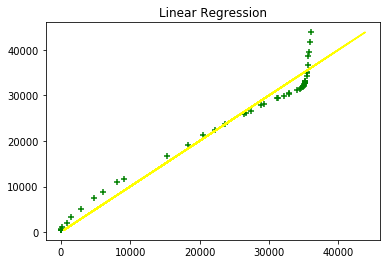

In [276]:
import matplotlib.colors as mcolors
plt.scatter (y_test, y_pred, marker="+", color ='green')
plt.plot(y_pred, reg.predict(x_test), color ='yellow')

plt.title('Linear Regression')
# plt.xlabel('Total Death Cases In Nepal')
# plt.ylabel('Total Cases Confirmed in Nepal')

plt.show()

Text(0, 0.5, 'Total COIVD Death Cases in Italy')

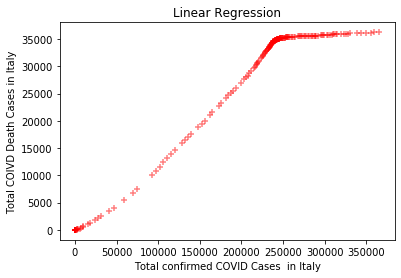

In [280]:
plt.scatter(x_train, y_train, marker="+",alpha = 0.5, color = 'red')
plt.title('Linear Regression')
plt.xlabel('Total confirmed COVID Cases  in Italy')
plt.ylabel('Total COIVD Death Cases in Italy')